In [106]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
data = np.load('../data/data_pca_50_y_mean.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [73]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((747, 50), (187, 50), (747,), (187,))

In [25]:
sum(y_test)

105

### Training a Model

In [14]:
model = SVC(C=1.0, kernel='rbf', gamma=0.01, probability=True)
model.fit(X_train, y_train)

SVC(gamma=0.01, probability=True)

In [15]:
model.score(X_train, y_train)

0.9049531459170014

In [16]:
model.score(X_test, y_test)

0.8021390374331551

### Model Evaluation
- Confusion Matrix
- Classification Report
- Kappa Score
- ROC and AUC (probability)

In [17]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test) # probability

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[65, 17],
       [20, 85]])

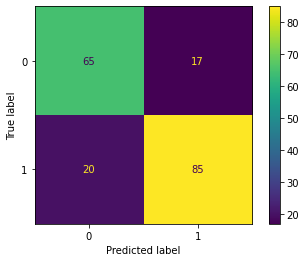

In [22]:
plot_confusion_matrix(model, X_test, y_test);

In [26]:
cr = metrics.classification_report(y_test, y_pred, target_names=['female', 'male'], output_dict=True)
pd.DataFrame(cr)

,female,male,accuracy,macro avg,weighted avg
precision,0.764706,0.833333,0.802139,0.799020,0.803240
recall,0.792683,0.809524,0.802139,0.801103,0.802139
f1-score,0.778443,0.821256,0.802139,0.799850,0.802482
support,82.000000,105.000000,0.802139,187.000000,187.000000


- The kappa score is a number between -1 and 1. Scores above 0.8 are generally considered good agreement.
- Zero or lower means no agreement (practically random labels)

In [27]:
# kappa
metrics.cohen_kappa_score(y_test, y_pred)

0.599803343166175

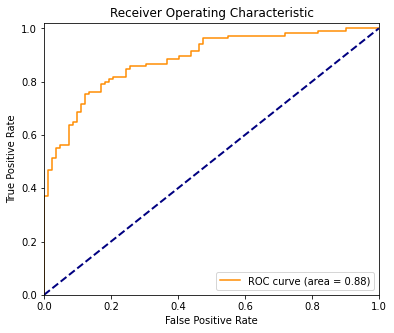

In [66]:
plt.figure(figsize=(6,5))
# ROC for male
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)

plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Parameter Tuning

In [92]:
svc = SVC()
param_grid = {
    'C': [0.5, 1, 2, 5, 7, 10], 
    'kernel': ['rbf', 'poly'], 
    'gamma': [0.002, 0.005, 0.01, 0.15, 0.02, 0.05],
    'coef0': [0,1]
}
clf = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5, verbose=2)
clf.fit(X, y)

D ...............C=5, coef0=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ..............C=7, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ..............C=7, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ..............C=7, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ..............C=7, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ..............C=7, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=7, coef0=0,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 2, 5, 7, 10], 'coef0': [0, 1],
                         'gamma': [0.002, 0.005, 0.01, 0.15, 0.02, 0.05],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [93]:
clf.best_params_

{'C': 5, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [94]:
print(clf.best_estimator_)

SVC(C=5, coef0=0, gamma=0.005)


In [95]:
clf.best_score_

0.822252889425565

**The Best**

In [96]:
model_best = SVC(C=5, coef0=0, kernel='rbf', gamma=0.005, probability=True)
model_best.fit(X_train, y_train)
model_best.score(X_test, y_test)

0.8074866310160428

In [104]:
y_pred = model_best.predict(X_test)
y_prob = model_best.predict_proba(X_test) # probability

In [98]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[65, 17],
       [19, 86]])

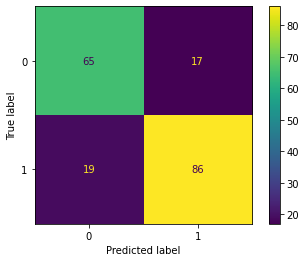

In [100]:
plot_confusion_matrix(model_best, X_test, y_test);

In [101]:
cr = metrics.classification_report(y_test, y_pred, target_names=['female', 'male'], output_dict=True)
pd.DataFrame(cr)

,female,male,accuracy,macro avg,weighted avg
precision,0.773810,0.834951,0.807487,0.804380,0.808141
recall,0.792683,0.819048,0.807487,0.805865,0.807487
f1-score,0.783133,0.826923,0.807487,0.805028,0.807721
support,82.000000,105.000000,0.807487,187.000000,187.000000


In [102]:
# kappa
metrics.cohen_kappa_score(y_test, y_pred)

0.610100776091741

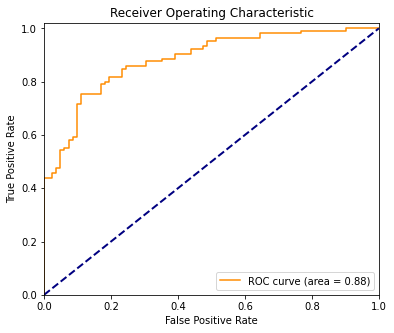

In [105]:
plt.figure(figsize=(6,5))
# ROC for male
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)

plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [107]:
pickle.dump(model_best, open('../model/model_svm.pickle', 'wb'))

In [108]:
pickle.dump(mean, open('../model/mean_preprocess.pickle', 'wb'))